# Deep Learning and CNN

### Image Loading, Pre-processing and Splitting

The following activities are performed as part of the Image Pre-processing task.

1. Loading the Dataset
    
    1.1 Checking the folder names in the dataset

    1.2 Reading the images name, their path and symbol name into the dataframe

    1.3 Loading the images

2. Visualising and Exploring the Images

    2.1 Examining the images dimension

    2.1 Inspecting individual images from the dataset along with their corresponding labels

    2.2 Examining the total number of occurrences of each distinct math symbol images


3. Pre-processing the Images

    3.1 Transforming categorical labels into numerical with label encoding
                        
    3.2 Normalising the images

    3.3 Splitting data into into training - 70% and testing - 30%

    3.4 Saving the different datasets

In [31]:
# Importing packages for processing
import numpy as np
import pandas as pd
import os

# Importing packages to load and display the images
import cv2
from PIL import Image

# Importing package for splitting the dataset
from sklearn.model_selection import train_test_split

# Importing package for data disualisation
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Loading the Dataset

#### 1.1 Checking the folder names in the dataset

In [32]:
# Storing the dataset path in a variable named 'dataset_path' 
# Note: Please change this to your current directory path where the dataset is downloaded
dataset_path = '/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946'

# Defining a function to get the names of subdirectories within the dataset path 
def get_subdirectories_names(dataset_path):
    return [name for name in os.listdir(dataset_path)
            if os.path.isdir(os.path.join(dataset_path, name))]

# Displaying the names of subdirectories in the dataset
dataset_subdirectories = get_subdirectories_names(dataset_path)
print('The dataset consist of the mathematical symbol images present in its respective subdirectories names as below:\n', dataset_subdirectories)

The dataset consist of the mathematical symbol images present in its respective subdirectories names as below:
 ['pm', 'leq', '-', 'sqrt', 'sum', 'theta', 'alpha', 'tan', ')', '[']


#### 1.2 Reading the images name, their path and symbol name into the dataframe

In [33]:
# Creating an empty list to store the Image names and paths
image_list = []

# Iterating through the Math Symbol Images dataset directory and its subdirectories
for root, dirs, files in os.walk(dataset_path):
    for file in files:

        # Getting the file path
        file_path = os.path.join(root, file)
        folder_name = os.path.basename(root)

        # Appending the file name and path to the list
        image_list.append({'Image Name': file, 'ImagePath': file_path, 'Image Symbol Name': folder_name})

# Creating a Pandas DataFrame to store the Math Symbol Image names, their paths and symbol names
df_math_symbol_dataset = pd.DataFrame(image_list)
df_math_symbol_dataset.sample(5)

,Image Name,ImagePath,Image Symbol Name
4834,exp3223.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/[/exp3223.jpg,[
3402,exp13425.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/alpha/exp13425.jpg,alpha
4867,exp6946.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/[/exp6946.jpg,[
1453,exp8705.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/-/exp8705.jpg,-
1965,exp47700.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/sqrt/exp47700.jpg,sqrt


In [34]:
# Defining a function to add appropriate Symbol name for the Image folder representing with Symbol 
def add_foldername(row):
    if row['Image Symbol Name'] == '-':
        val = 'minus'
    elif row['Image Symbol Name'] == ')':
        val = 'closed_bracket'
    elif row['Image Symbol Name'] == '[':
        val = 'squared_bracket'
    else:
        val = row['Image Symbol Name']
    return val

In [35]:
# Seting the maximum column width to 400
pd.set_option('max_colwidth', 400)

# Calling the 'add_foldername' function to create a new column 'Label' representing appropriate Symbol name for the Image folder representing with Symbol
df_math_symbol_dataset['Label'] = df_math_symbol_dataset.apply(add_foldername, axis=1)

In [36]:
# Displaying the few random images
df_math_symbol_dataset.sample(5)

,Image Name,ImagePath,Image Symbol Name,Label
4579,[_85161.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/[/[_85161.jpg,[,squared_bracket
2068,exp79194.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/sum/exp79194.jpg,sum,sum
2335,sum_5544.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/sum/sum_5544.jpg,sum,sum
3288,exp67064.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/alpha/exp67064.jpg,alpha,alpha
3746,tan_21771.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/tan/tan_21771.jpg,tan,tan


In [37]:
# Removing the first row from the dataframe
df_math_symbol_dataset.drop(index=df_math_symbol_dataset.index[0], axis=0, inplace=True)

# Displaying the few initial images
df_math_symbol_dataset.head(5)

,Image Name,ImagePath,Image Symbol Name,Label
1,exp29202.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/pm/exp29202.jpg,pm,pm
2,exp27549.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/pm/exp27549.jpg,pm,pm
3,pm_1776.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/pm/pm_1776.jpg,pm,pm
4,exp40277.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/pm/exp40277.jpg,pm,pm
5,exp54570.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/pm/exp54570.jpg,pm,pm


#### 1.3 Loading the images

In [38]:
# Creating a new column 'Image' in the DataFrame by mapping each image path to its corresponding image from its image path
df_math_symbol_dataset['Image'] = df_math_symbol_dataset.ImagePath.map(lambda f: Image.open(f))

# Displaying the few random images
df_math_symbol_dataset.sample(5)

,Image Name,ImagePath,Image Symbol Name,Label,Image
3796,exp70109.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/tan/exp70109.jpg,tan,tan,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=45x45 at 0x1418E0B20>
3027,exp66662.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/alpha/exp66662.jpg,alpha,alpha,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=45x45 at 0x141612980>
4377,exp69270.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/)/exp69270.jpg,),closed_bracket,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=45x45 at 0x141A8E5C0>
2086,exp74894.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/sum/exp74894.jpg,sum,sum,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=45x45 at 0x140D29930>
3964,exp11022.jpg,/Users/monalipatil/Monali/MDSI-Semester1/Deep Learning and Convolutional Neural Network/Assignment1/dataset_42028assg1_14370946/tan/exp11022.jpg,tan,tan,<PIL.JpegImagePlugin.JpegImageFile image mode=L size=45x45 at 0x14196CA60>


### 2. Visualising and Exploring the Images

In [39]:
# Initialising empty lists to store images and labels
x_images = []
y_labels = []

# Iterating through each row in the images and lables dataframe
for index, row in df_math_symbol_dataset.iterrows():

    # Append the image to X_data
    x_images.append(row['Image'])
    
    # Append the corresponding label to Y_data
    y_labels.append(row['Label'])

# Converting lists to numpy arrays
x_images = np.array(x_images)
y_labels = np.array(y_labels)

#### 2.1 Examining the images dimension

In [40]:
# Checking the shape of the datafreams
print(np.shape(x_images))
print(np.shape(y_labels))

(4999, 45, 45)
(4999,)


The dataset consists of 4999 images of mathematical symbols, where each image has a shape of 45x45. The labels are provided for each image, indicating the class or category of the mathematical symbol depicted in the corresponding image.

- x_images -> (4999, 45, 45): This dataframe indicates the 4999 images of math symbols and each has a resolution of 45x45. So, the dataset is essentially a collection of 4999 2D arrays, where each array represents a grey image of a math symbol.

- y_labels -> (4999,): This dataframe indicates the labels associated with each image. There are 4999 labels, one for each image in the dataset. The labels are stored as a 1D array.

In [41]:
# Checking the datatype if the dataframes
print("i) Datatype of x_images:", x_images.dtype)
print("ii) Datatype of y_labels:", y_labels.dtype)
print("iii) Type of x_images:", type(x_images))
print("iv) Type of y_labels:", type(y_labels))

i) Datatype of x_images: uint8
ii) Datatype of y_labels: <U15
iii) Type of x_images: <class 'numpy.ndarray'>
iv) Type of y_labels: <class 'numpy.ndarray'>


- Datatype of x_images: uint8 The data type of the elements in x_images is uint8, which stands for unsigned 8-bit integers representing the intensity value of a pixel in the image. This data type is commonly used to represent pixel values in images.

- Datatype of y_labels: <U15 The data type of the elements in y_labels is <U15, which stands for Unicode string of maximum length 15 characters. Each element of y_labels is a string representing the label or category of the corresponding image in x_images.

- Type of x_images and y_labels: <class 'numpy.ndarray'> These both are NumPy arrays.

#### 2.2 Inspecting individual images from the dataset along with their corresponding labels

The shape is:  (45, 45)
The label is: pm


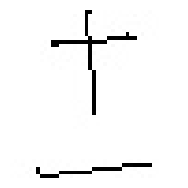

In [42]:
# Visualising  the shape of the few random individual images and checking along with their corresponding labels
img_index = 9
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.axis('off')
ax.imshow(x_images[img_index], cmap='gray')
#print(labelNames[y_train[img_index]])
print('The shape is: ',np.shape(x_images[img_index]))
print('The label is:', y_labels[img_index])


- The shape of the above illustrated image (at index 9) is (45, 45) exhibiting the selected image has a resolution of 45x45 dimension, the height and width of the image, respectively. Therefore, the image is a square with 45 pixels along each side.

- The corresponding label for the selected image is 'pm' i.e. plus-minus mathematical symbol.

The shape is:  (45, 45)
The label is: squared_bracket


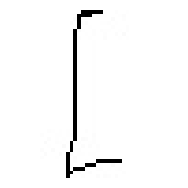

In [43]:
# Visualising  the shape of the few random individual images and checking along with their corresponding labels
img_index = 4991
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.axis('off')
ax.imshow(x_images[img_index], cmap='gray')
#print(labelNames[y_train[img_index]])
print('The shape is: ',np.shape(x_images[img_index]))
print('The label is:', y_labels[img_index])

- The above output demonstrates that the selected image (at index 4991) is a square image with dimension 45x45 and represents a squared bracket symbol, as indicated by its corresponding label.

The shape is:  (45, 45)
The label is: theta


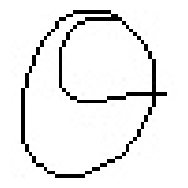

In [44]:
# Visualising  the shape of the few random individual images and checking along with their corresponding labels
img_index = 2900
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.axis('off')
ax.imshow(x_images[img_index], cmap='gray')
#print(labelNames[y_train[img_index]])
print('The shape is: ',np.shape(x_images[img_index]))
print('The label is:', y_labels[img_index])

- The image shown above, (from index 2900), is also a square image measuring 45x45 dimension. It describes the mathematical symbol 'theta', as confirmed by its associated label.

The shape is:  (45, 45)
The label is: leq


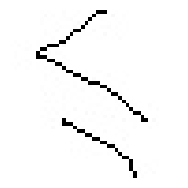

In [45]:
# Visualising  the shape of the few random individual images and checking along with their corresponding labels
img_index = 500
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.axis('off')
ax.imshow(x_images[img_index], cmap='gray')
#print(labelNames[y_train[img_index]])
print('The shape is: ',np.shape(x_images[img_index]))
print('The label is:', y_labels[img_index])

- The above displayed image, (from index 500), is likewise a square image with dimensions of 45x45. It depicts the mathematical symbol 'less than or equal to', as indicated by its corresponding label.

The shape is:  (45, 45)
The label is: sqrt


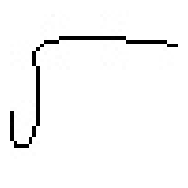

In [46]:
# Visualising  the shape of the few random individual images and checking along with their corresponding labels
img_index = 1900
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.axis('off')
ax.imshow(x_images[img_index], cmap='gray')
#print(labelNames[y_train[img_index]])
print('The shape is: ',np.shape(x_images[img_index]))
print('The label is:', y_labels[img_index])

- The image shown above, (from index 500), is also a square-shaped image measuring 45x45 dimension representing the mathematical symbol 'square root', as confirmed by its associated label.

#### 2.3 Examining the total number of occurrences of each distinct math symbol images

In [50]:
# Checking the total number of occurrences of each distinct math symbol images
label_counts = df_math_symbol_dataset['Label'].value_counts()

# Displaying the total count of each distinct math symbol images
print("The total number of each Distinct Images:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

The total numbe of each Distinct Images:
leq: 500
minus: 500
sqrt: 500
sum: 500
theta: 500
alpha: 500
tan: 500
closed_bracket: 500
squared_bracket: 500
pm: 499


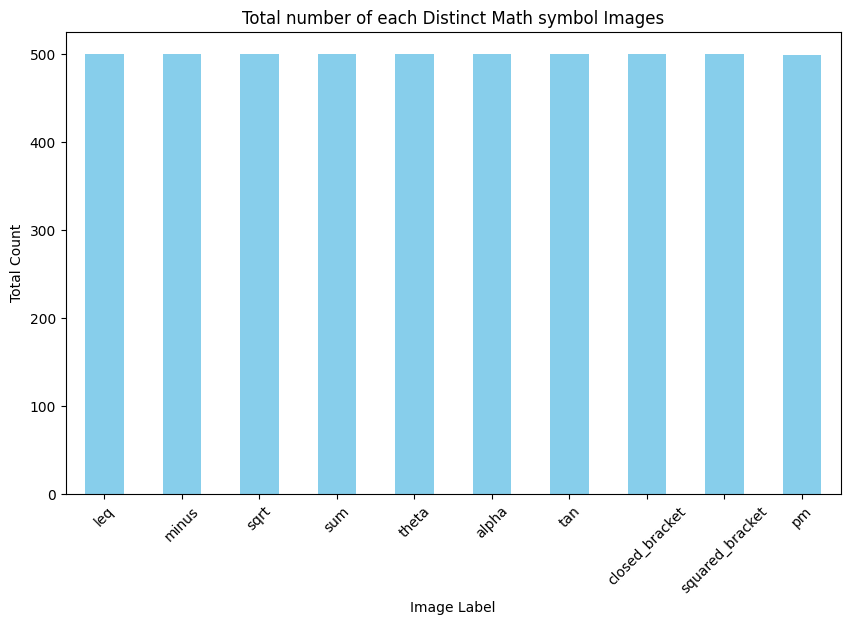

In [53]:
# Visualising the total counts of images in a bar graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Total number of each Distinct Math symbol Images')
plt.xlabel('Image Label')
plt.ylabel('Total Count')
plt.xticks(rotation=45)  
plt.show()

- The above output reveals that there are 500 images of each math symbol, with the exception of the 'pm' (plus minus) symbol, which has 499 occurrences.

- The bar graph provides a visual representation of the distribution of math symbol images, highlighting no imbalances in the dataset. The x-axis represents the image labels, and the y-axis represents the total count of occurrences for each label.


### 3. Preprocessing the Images 

#### 3.1 Converting categorical labels into numerical values

In [ ]:
# Creating the list with unique label names representing the math symbols
labelNames = ["pm", "leq", "minus", "sqrt", "sum", "theta", "alpha", "tan", "closed_bracket", "squared_bracket"]

- The above list labelNames contains unique label names representing different mathematical symbols. These labels are strings such as "pm", "leq", "minus", etc. 

In [ ]:
# Creating a dictionary to map label names to indices (from 0 to 0)
label_to_numbers = {label: index for index, label in enumerate(labelNames)}

- Utilizing enumerate() function to iterate over the labelNames list to mapp each label name to its corresponding index (from 0 to 9) as illustrated below. 

In [ ]:
# Checking the mapped labels
label_to_numbers

{'pm': 0,
 'leq': 1,
 'minus': 2,
 'sqrt': 3,
 'sum': 4,
 'theta': 5,
 'alpha': 6,
 'tan': 7,
 'closed_bracket': 8,
 'squared_bracket': 9}

#### Performing label encoding

In [ ]:
# Replacing labels in Y_data with their corresponding numbers
Y_labels_mapped = np.array([label_to_numbers[label] for label in y_labels])

- As categorical data cannot be directly used in classification algorithms because these algorithms are based and operate on mathematical equations that require numerical inputs. 

- Therefore, it is necessary to convert the categorical data of these lable features into numerical data. To achieve this, employing label encoding method, which creates unique integer for every distinct category in the label feature. 

- Thus, a new dataframe Y_labels_mapped consisting of each label represented by its numerical index instead of the original string label of the math symbols.

#### 3.2 Normalising the images

In [ ]:
# Normalising the images
x_images_normalized = x_images / 255.0  

- Performing normalisation with dividing by 255 scales to the range [0, 1] to ensure that all input features dimension values are within this range and with similar scales, making them more suitable for processing of neural networks which can improve the convergence of the optimization algorithm during training.

#### 3.3 Splitting the dataset into training - 70% and testing - 30%

In [ ]:
# Splitting the dataset into training and testing sets (with 70% train and 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(x_images_normalized, Y_labels_mapped, test_size=0.3, random_state=19)

In [ ]:
# Checking the shapes of training and testing datasets
print('After splitting below are the datasets shape:')
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

After splitting below are the datasets shape:
X_train shape: (3499, 45, 45)
Y_train shape: (3499,)
X_test shape: (1500, 45, 45)
Y_test shape: (1500,)


- This splitting strategy ensures that (3499 samples out of 4999) 70% of the data is used for training the model (X_train and Y_train), while the remaining (1500 smaples out of 4999) 30% is reserved for evaluating the model's performance (X_test and Y_test). 

- Thus, it helps to assess how well the model generalizes to unseen data.

#### 3.4 Saving the different datasets

In [ ]:
# Saving the training and testing datasets
np.savez('math_symbol_split_datasets.npz', X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

- Saving the training and testing datasets into a NumPy binary file with the name "math_symbol_split_datasets.npz utilizing np.savez() function. 

- To use these processed datasets further for features extraction and modeling tasks np.load() function will be used to load them back.  